In [11]:
import numpy as np
import matplotlib.pyplot as plt 

from matplotlib import animation
from itertools import combinations 

from PointTracking_v2 import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

Make a plot to compare the trajectories as temperature varies 

In [19]:
temperatures = np.array([0.0, 0.1, 0.2, 0.25, 0.3, 0.4])
#temperatures = np.array([0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1])
numReal = 500000

angle_trajs = np.zeros((len(temperatures), numReal//250+1))
dist_trajs = np.zeros((len(temperatures), numReal//250+1))

Total Imag Time:  1.8552463054656982
kmax:  4.0212385965949355
T:  0.0
(2001, 128, 128)
(1, 128, 128)


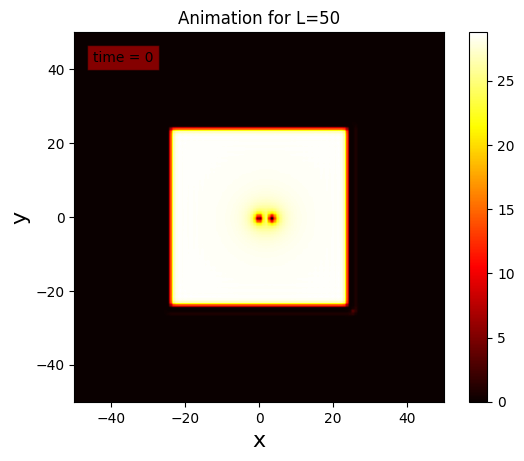

C:\Users\TQC User\AppData\Local\Temp\ipykernel_12996\2335849947.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  ang = np.arctan(ysep/xsep)


[[-0.          0.24497866  0.24497866 ... -1.19028995 -1.03037683
  -1.03037683]]
Total Imag Time:  1.906153678894043
kmax:  4.0212385965949355
T:  0.8085179925372403
(2001, 128, 128)
(1, 128, 128)


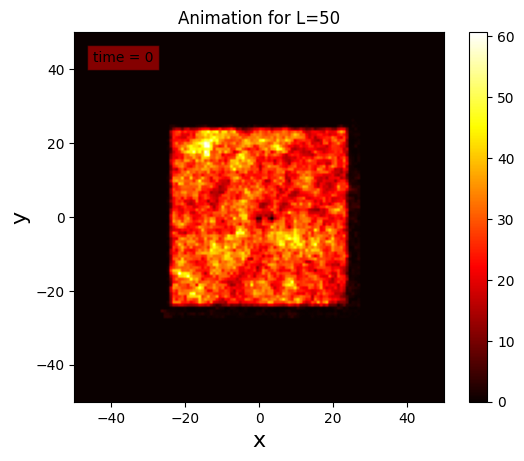

C:\Users\TQC User\AppData\Local\Temp\ipykernel_12996\2335849947.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  ang = np.arctan(ysep/xsep)


[[-0.24497866 -0.24497866 -0.24497866 ... -1.37340077 -1.37340077
  -1.37340077]]
Total Imag Time:  1.946770429611206
kmax:  4.0212385965949355
T:  1.6170359850744807
(2001, 128, 128)
(1, 128, 128)


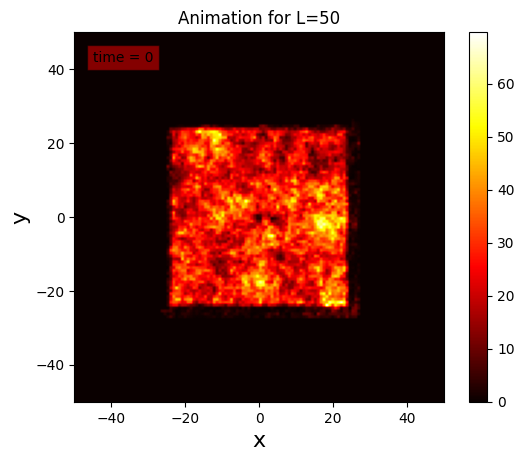

C:\Users\TQC User\AppData\Local\Temp\ipykernel_12996\2335849947.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  ang = np.arctan(ysep/xsep)


[[0.19739556 0.19739556 0.19739556 ... 1.42889927 1.42889927 1.42889927]]
Total Imag Time:  2.0093631744384766
kmax:  4.0212385965949355
T:  2.0212949813431007
(2001, 128, 128)
(1, 128, 128)


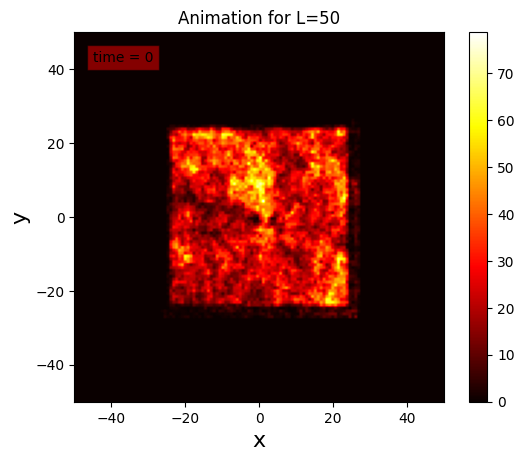

In [ ]:
for t, temp in enumerate(temperatures): 
    g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = numReal, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = temp, dst = False, vortex = True)
    tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)
    v_traj, antiv_traj, circ_array = pt.labelVortices(tracker, getCirc = True) 

    v_traj_arr = np.array(v_traj) 
    antiv_traj_arr = np.array(antiv_traj) 

    vortex_combos = np.array(list(combinations(antiv_traj_arr, 2))) # specifically for the antivortex case.... lacking for the vortex/antivortex pair case... 

    # initialize values for distance and angle trajectories 
    distance_arr = np.zeros((len(vortex_combos), len(g.snaps)))
    angle_arr = np.zeros((len(vortex_combos), len(g.snaps))) 

    for i, pair in enumerate(vortex_combos): # for each pair - find the distance 
        for j in range(len(vortex_combos[0][0])): 
            point1 = pair[0][j] 
            point2 = pair[1][j] 
            xsep = point1[0] - point2[0] 
            ysep = point1[1] - point2[1] 
            dist = np.sqrt(np.abs(point1[0] - point2[0])**2 + np.abs(point1[1] - point2[1])**2) 
            ang = np.arctan(ysep/xsep) 

            distance_arr[i,j] = dist 
            angle_arr[i,j] = ang

    stddev_angles = np.std(angle_arr, axis = 1) 
    max_index = np.where(stddev_angles == max(stddev_angles))

    angle_traj = angle_arr[max_index]
    distance_traj = distance_arr[max_index]
    print(angle_traj)
    angle_trajs[t] = angle_traj 
    dist_trajs[t] = distance_traj 
    # find the largest angle standard deviation?  
    


For future work: 
- Do some sort of averaging over several iterations of the same temperature 
- Figure out the issue with the tracking for higher temperatures and include these in the loop 

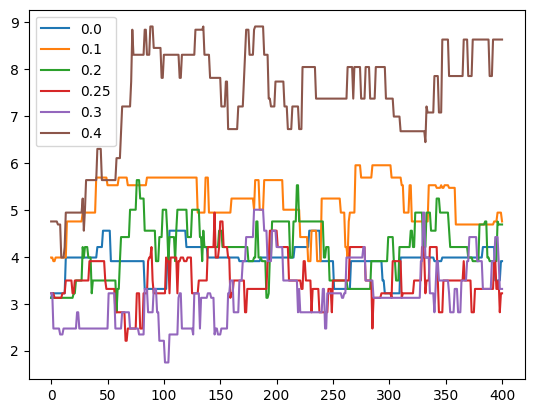

In [18]:
plt.figure() 
for i in range(len(dist_trajs)): 
    plt.plot(dist_trajs[i], label = temperatures[i]) 
plt.legend() 
plt.show() 

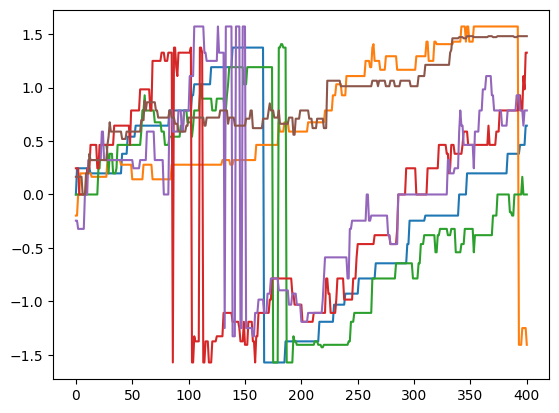

In [15]:
plt.figure() 
for i in range(len(angle_trajs)): 
    plt.plot(angle_trajs[i]) 
plt.show() 